<a href="https://colab.research.google.com/github/AlessandraParziale/Fairness-Thesis/blob/main/ADULT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ADULT**
[Questo set di dati viene utilizzato per prevedere se il reddito supera i 50.000 dollari all'anno.]

## ***Classification***

### Loading the Data

In [ ]:
import os
import pandas as pd
import xgboost as xgb
import requests
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [ ]:
DATA_DIR = "/content/ADULT-Classification"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

def ensure_download(url, fname):
    fpath = f"{DATA_DIR}/{fname}"
    if not os.path.isfile(fpath):
        response = requests.get(url)
        with open(fpath, 'wb') as file:
            file.write(response.content)

def load_adult():

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    fname = "adult-data.csv"
    ensure_download(url, fname)

    cols = ["age", "workclass", "fnlwgt", "education",
            "education_num", "marital_status", "occupation",
            "relationship", "race", "sex", "capital_gain",
            "capital_loss", "hours_per_week", "native_country",
            "income_per_year"
           ]

    data = pd.read_csv(url, names=cols, na_values='?', delimiter=', ')

    data.dropna(inplace=True)

    #Converto la colonna 'income_per_year' in binaria: 0 se <=50K, 1 altrimenti
    data['income_per_year'] = data['income_per_year'].map(lambda x: 0 if x == '<=50K' else 1)

    X = data.drop('income_per_year', axis=1)
    y = data['income_per_year']

    return X, y


X, y = load_adult()

<ipython-input-9-618c2086ecb4>:26: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(url, names=cols, na_values='?', delimiter=', ')


In [ ]:
# Trasformazioni features numeriche e categoriali

numeric_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



---

### **Random Forest Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

In [ ]:
# Valutazione modello

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix Random Forest:", conf_matrix)
print("Accuracy Random Forest:", accuracy)
print("Precision Random Forest:", precision)
print("Recall Random Forest:", recall)

Confusion Matrix Random Forest: [[4149  354]
 [ 546  984]]
Accuracy Random Forest: 0.8508204873197415
Precision Random Forest: 0.7354260089686099
Recall Random Forest: 0.6431372549019608



---


### **Logistic Regression Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

lr_classifier.fit(X_train, y_train)

y_pred_lr = lr_classifier.predict(X_test)


In [ ]:
# Valutazione modello

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Precision
precision_lr = precision_score(y_test, y_pred_lr)

# Recall
recall_lr = recall_score(y_test, y_pred_lr)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Confusion Matrix Random Forest:", conf_matrix_lr)
print("Accuracy Random Forest:", accuracy_lr)
print("Precision Random Forest:", precision_lr)
print("Recall Random Forest:", recall_lr)

Confusion Matrix Random Forest: [[4201  302]
 [ 582  948]]
Accuracy Random Forest: 0.8534725675451682
Precision Random Forest: 0.7584
Recall Random Forest: 0.6196078431372549


---
### **eXtreme Gradient Boosting Model (XGBoost)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)


In [ ]:
# Valutazione modello

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Precision
precision_xgb = precision_score(y_test, y_pred_xgb)

# Recall
recall_xgb = recall_score(y_test, y_pred_xgb)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)


print("Confusion Matrix Random Forest:", conf_matrix_xgb)
print("Accuracy Random Forest:", accuracy_xgb)
print("Precision Random Forest:", precision_xgb)
print("Recall Random Forest:", recall_xgb)

Confusion Matrix Random Forest: [[4223  280]
 [ 494 1036]]
Accuracy Random Forest: 0.8717056190949776
Precision Random Forest: 0.7872340425531915
Recall Random Forest: 0.677124183006536


## ***Clustering***

### Loading the Data

In [ ]:
import pandas as pd
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


In [ ]:
DATA_DIR = "/content/ADULT-Clustering"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

def ensure_download(url, fname):
    fpath = f"{DATA_DIR}/{fname}"
    if not os.path.isfile(fpath):
        response = requests.get(url)
        with open(fpath, 'wb') as file:
            file.write(response.content)

def load_adult():

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    fname = "adult-data.csv"
    ensure_download(url, fname)

    cols = ["age", "workclass", "fnlwgt", "education",
        "education_num", "marital_status", "occupation",
        "relationship", "race", "sex", "capital_gain",
        "capital_loss", "hours_per_week", "native_country",
        "income_per_year"
        ]

    data = pd.read_csv(f"{DATA_DIR}/{fname}", names=cols, na_values='?', delimiter=', ')

    data.dropna(inplace=True)
    return data

X = load_adult()


<ipython-input-19-43df4517dde6>:26: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(f"{DATA_DIR}/{fname}", names=cols, na_values='?', delimiter=', ')


In [ ]:
# Trasformazioni features numeriche e categoriali

numeric_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = preprocessor.fit_transform(X)

---
### **K-Means**

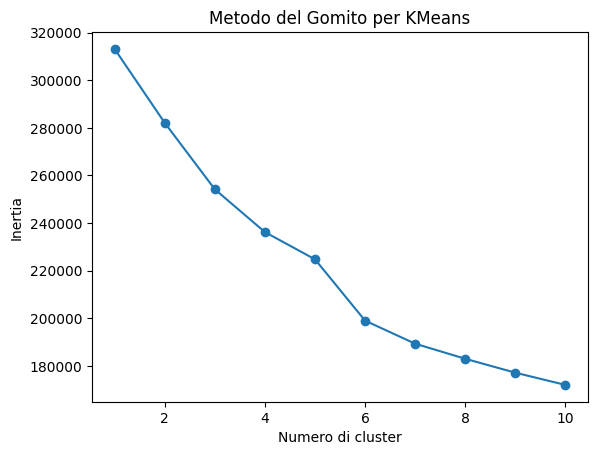

In [ ]:
# Metodo del gomito (Elbow Method)


inertia = []

k_values = range(1, 11)

# Calcolo inertia per ogni valore di k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Grafico
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Numero di cluster')
plt.ylabel('Inertia')
plt.title('Metodo del Gomito per KMeans')
plt.show()


In [ ]:
# K-Means con 6 cluster

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
print(labels)


# Valutazione modello

# Coefficiente di Silhouette
silhouette_coefficient = silhouette_score(X, labels)
print("Il coefficiente di Silhouette è:", silhouette_coefficient)



[1 1 5 ... 5 4 5]
Il coefficiente di Silhouette è: 0.12506785929798545


---
### **K-Center**

In [ ]:
# K-Center con 6 cluster

def kcenter(X, k):
    X_dense = X.toarray()
    centers = [X_dense[0]]
    while len(centers) < k:
        #Calcolo distanze
        distances = cdist(X_dense, centers).min(axis=1)
        #Selezione nuovo centro
        new_center = X_dense[np.argmax(distances)]
        # Aggiunta nuovo centro alla lista
        centers.append(new_center)
    return np.array(centers)


k = 6
cluster_centers = kcenter(X, k)

def assign_clusters(X, cluster_centers):
    #Conversione in una matrice densa
    X_dense = X.toarray()
    #Distanze tra ogni punto e tutti i centri dei cluster
    distances = cdist(X_dense, cluster_centers)
    #Trovo l'indice del centro più vicino per ciascun punto
    cluster_indices = np.argmin(distances, axis=1)

    return cluster_indices


labels = assign_clusters(X, cluster_centers)
print(labels)


# Valutazione modello

# Coefficiente di Silhouette
silhouette_coefficient = silhouette_score(X, labels)
print("Il coefficiente di Silhouette è:", silhouette_coefficient)


[0 0 0 ... 0 0 0]
Il coefficiente di Silhouette è: 0.33117170488420195


---
### **K-Median**

In [ ]:
# K-Median con 6 cluster


def k_median(X, k, max_iters=100):
    #Conversione in una matrice densa
    X_dense = X.toarray()
    #Inizializzazione casuale
    centroids = X_dense[np.random.choice(range(X_dense.shape[0]), size=k, replace=False)]

    for _ in range(max_iters):
        #Calcolo distanza tra ogni punto e ogni centroide
        distances = np.linalg.norm(X_dense[:, np.newaxis, :] - centroids, axis=2)
        #Indice del centroide più vicino per ogni punto
        labels = np.argmin(distances, axis=1)
        #Calcolo i nuovi centroidi come mediane dei punti assegnati a ciascun cluster
        new_centroids = np.array([np.median(X_dense[labels == i], axis=0) for i in range(k)])

        if np.allclose(new_centroids, centroids):
            break

        centroids = new_centroids

    return centroids, labels


centroids, labels = k_median(X, k=6)
print(labels)


# Valutazione modello

# Coefficiente di Silhouette
silhouette_coefficient = silhouette_score(X, labels)
print("Il coefficiente di Silhouette è:", silhouette_coefficient)



[5 5 0 ... 0 4 0]
Il coefficiente di Silhouette è: 0.09948456262841812


## ***Anomaly detection***

### Loading the Data

In [ ]:
import pandas as pd
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [ ]:
DATA_DIR = "/content/ADULT-AnomalyDetection"


if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

def ensure_download(url, fname):
    fpath = f"{DATA_DIR}/{fname}"
    if not os.path.isfile(fpath):
        response = requests.get(url)
        with open(fpath, 'wb') as file:
            file.write(response.content)

def load_adult():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    fname = "adult-data.csv"
    ensure_download(url, fname)

    cols = ["age", "workclass", "fnlwgt", "education",
        "education_num", "marital_status", "occupation",
        "relationship", "race", "sex", "capital_gain",
        "capital_loss", "hours_per_week", "native_country",
        "income_per_year"
        ]

    data = pd.read_csv(f"{DATA_DIR}/{fname}", names=cols, na_values='?', delimiter=', ')

    data.dropna(inplace=True)
    return data


X = load_adult()


<ipython-input-27-91a226295c39>:26: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(f"{DATA_DIR}/{fname}", names=cols, na_values='?', delimiter=', ')


In [ ]:
# Trasformazioni features numeriche e categoriali

numeric_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_model = preprocessor.fit_transform(X)

---


###  **ISODepth (basato sulla profondità)**

In [ ]:
# Isolation Forest Depth (basato sulla profondità)


isoforest_model = IsolationForest(random_state=42, contamination=0.1)
isoforest_model.fit(X_model)

anomaly_preds = isoforest_model.predict(X_model)

X['isoforest_anomaly'] = anomaly_preds


anomaly_instances = X[X['isoforest_anomaly'] == -1]
num_anomalies = len(anomaly_instances)
print("Numero di anomalie:", num_anomalies)
print("\nIstanze anomale:")
print(anomaly_instances)


Numero di anomalie: 3017

Istanze anomale:
       age     workclass  fnlwgt     education  education_num  \
4       28       Private  338409     Bachelors             13   
6       49       Private  160187           9th              5   
11      30     State-gov  141297     Bachelors             13   
21      54       Private  302146       HS-grad              9   
50      25       Private   32275  Some-college             10   
...    ...           ...     ...           ...            ...   
32538   38       Private  139180     Bachelors             13   
32540   45     State-gov  252208       HS-grad              9   
32545   39     Local-gov  111499    Assoc-acdm             12   
32553   32       Private  116138       Masters             14   
32560   52  Self-emp-inc  287927       HS-grad              9   

              marital_status       occupation   relationship  \
4         Married-civ-spouse   Prof-specialty           Wife   
6      Married-spouse-absent    Other-service  N

---


### **LOF (basato sulla densità)**

In [ ]:
# Local Outlier Factor (basato sulla densità)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof.fit(X_model)

anomaly_labels = lof.fit_predict(X_model)

num_anomalies = (anomaly_labels == -1).sum()
print(f"Numero di anomalie rilevate: {num_anomalies}")
print("Etichette delle anomalie:")
print(anomaly_labels)


Numero di anomalie rilevate: 3017
Etichette delle anomalie:
[1 1 1 ... 1 1 1]
